In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Preview data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dataset Overview

Each row represents one customer in a telecom subscription business.

Key columns:
- `customerID`: Unique identifier for each customer
- `tenure`: Number of months the customer has stayed with the company
- `MonthlyCharges`: Monthly amount charged to the customer
- `TotalCharges`: Total amount charged to the customer
- `Contract`: Type of contract (Month-to-month, One year, Two year)
- `PaymentMethod`: How the customer pays
- `Churn`: Whether the customer left the company (Yes/No)

In [ ]:
## Target Variable

The target variable for this analysis is `Churn`, which indicates whether a customer has discontinued the service.


In [2]:
df.shape


(7043, 21)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isna().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
 # Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [10]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df = df.dropna()

## Data Cleaning Summary

- Converted `TotalCharges` to numeric format
- Identified missing values caused by new customers
- Removed a small number of incomplete records
- Ensured correct data types for analysis

In [13]:
# Overall churn rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100
churn_rate

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

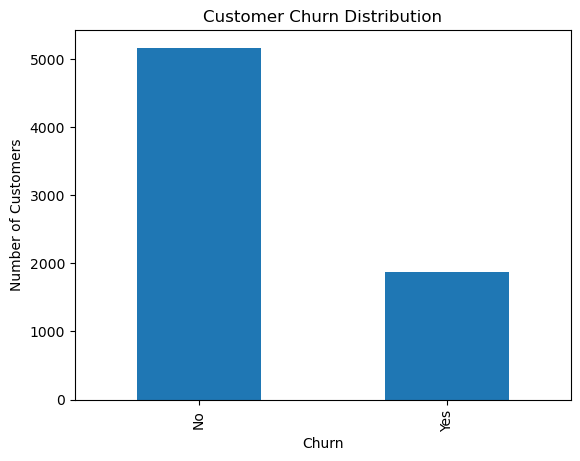

In [14]:
df['Churn'].value_counts().plot(kind='bar')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

## Churn Overview

Approximately 27% of customers in the dataset have churned.  
This indicates that customer churn is a significant issue for the business and warrants further analysis to understand its drivers.


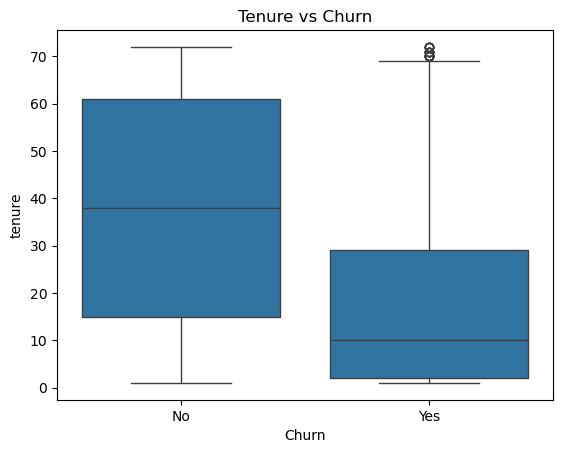

In [17]:
import seaborn as sns

sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

## Key Insight: Tenure and Churn

Customers who churn generally have significantly lower tenure compared to customers who stay.  
This suggests that early customer experience is a critical factor in retention.


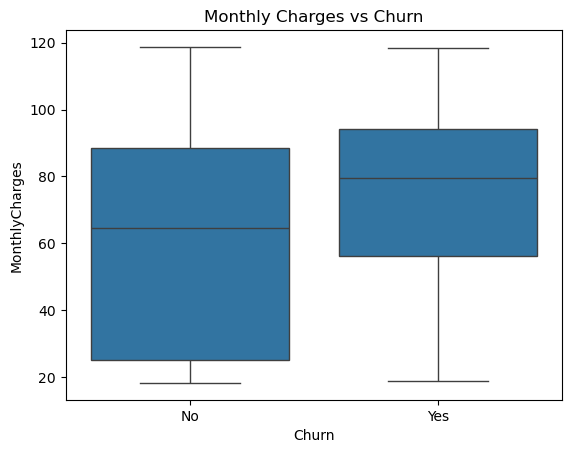

In [18]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

## Key Insight: Monthly Charges and Churn

Customers who churn tend to have higher monthly charges compared to customers who stay.  
This suggests that pricing or perceived value may influence customer retention.

## Summary of Insights
- Around 27% of customers in the dataset have churned, indicating churn is a meaningful business problem.
- Customers who churn generally have lower tenure, meaning churn often occurs early in the customer lifecycle.
- Customers with higher monthly charges appear more likely to churn, suggesting pricing sensitivity.


## Business Recommendations
Based on the analysis, the business could consider the following actions:

- Improve onboarding and early customer experience, since most churn occurs among newer customers.
- Identify high-risk customers early based on tenure and monthly charges and provide targeted retention offers.
- Review pricing or value communication for higher-cost plans to reduce price-driven churn.

## Conclusion

In this project, I analyzed customer churn for a telecom company using real customer data.  
After cleaning and preparing the dataset, I explored churn patterns and identified key drivers such as customer tenure and monthly charges.

The analysis showed that churn tends to occur early in the customer lifecycle and is more common among customers with higher monthly charges.  
Based on these findings, I proposed business recommendations focused on improving early customer experience and targeted retention strategies.

## Limitations

- The analysis is based on historical data and does not establish causation.
- Some factors influencing churn (such as customer satisfaction) may not be fully captured in the dataset.
